In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer

import re,string,unicodedata

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation

In [4]:
data_1 = pd.read_json("../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json", lines=True)
data_2 = pd.read_json("../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df = pd.concat([data_1,data_2])
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


Data Preprocess

In [5]:
df.shape[0]

55328

In [6]:
df.isnull()

,article_link,headline,is_sarcastic
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
28614,False,False,False
28615,False,False,False
28616,False,False,False
28617,False,False,False


In [7]:
#check the missing values
df.isna().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [8]:
del df['article_link']
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

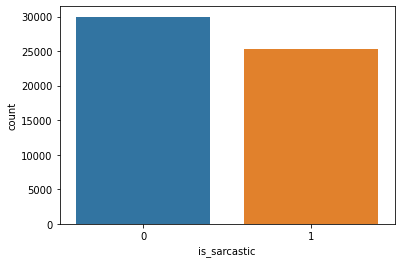

In [9]:
sns.countplot(df.is_sarcastic)

Dataset Cleaning






In [10]:
# contraction_dict = don't -> do not

contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}



contractions_re=re.compile('(%s)' % '|'.join(contractions.keys()))
def expand_contractions(text,contractions_dict=contractions):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews

In [11]:
from bs4 import BeautifulSoup
#html
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


In [12]:
def clean_text(text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()    
    text = expand_contractions(text)
    text = strip_html(text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

In [13]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def CleanTokenize(df):
    head_lines = list()
    lines = df["headline"].values.tolist()

    for line in lines:
        line = clean_text(line)
        # tokenize the text
        tokens = word_tokenize(line)
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        # remove stop words
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

head_lines = CleanTokenize(df)
head_lines[0:20]

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


[['former',
  'versace',
  'store',
  'clerk',
  'sues',
  'secret',
  'black',
  'code',
  'minority',
  'shoppers'],
 ['roseanne',
  'revival',
  'catches',
  'thorny',
  'political',
  'mood',
  'better',
  'worse'],
 ['mom',
  'starting',
  'fear',
  'sons',
  'web',
  'series',
  'closest',
  'thing',
  'grandchild'],
 ['boehner',
  'wants',
  'wife',
  'listen',
  'come',
  'alternative',
  'debtreduction',
  'ideas'],
 ['jk', 'rowling', 'wishes', 'snape', 'happy', 'birthday', 'magical', 'way'],
 ['advancing', 'worlds', 'women'],
 ['fascinating', 'case', 'eating', 'labgrown', 'meat'],
 ['ceo', 'send', 'kids', 'school', 'work', 'company'],
 ['top', 'snake', 'handler', 'leaves', 'sinking', 'huckabee', 'campaign'],
 ['fridays', 'morning', 'email', 'inside', 'trumps', 'presser', 'ages'],
 ['airline',
  'passengers',
  'tackle',
  'man',
  'rushes',
  'cockpit',
  'bomb',
  'threat'],
 ['facebook', 'reportedly', 'working', 'healthcare', 'features', 'apps'],
 ['north',
  'korea',
  'pr

(-0.5, 999.5, 499.5, -0.5)

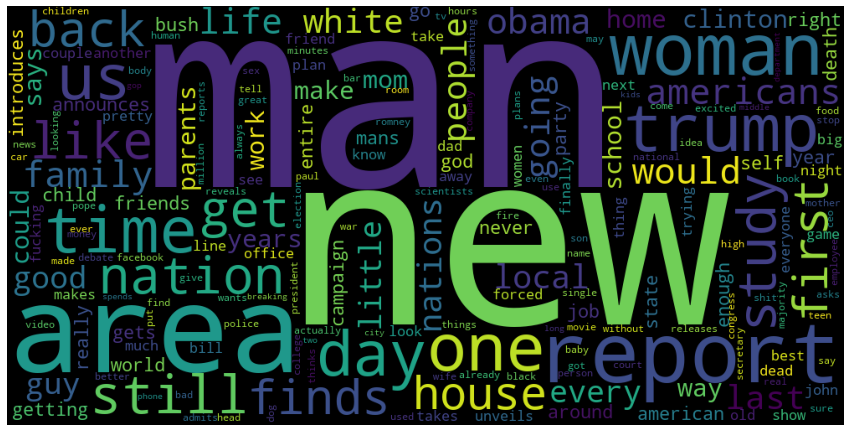

In [14]:
# Most Frequent sarcastic words
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator

pos_data = df.loc[df['is_sarcastic'] == 1]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 999.5, 499.5, -0.5)

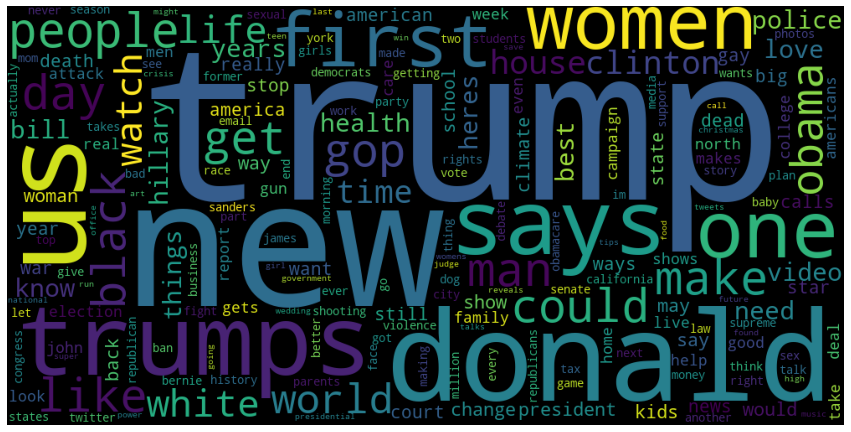

In [15]:
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator

pos_data = df.loc[df['is_sarcastic'] == 0]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

In [16]:
df["is_sarcastic"] = df["is_sarcastic"].map({0: "Not Sarcastic", 1: "Sarcastic"})
print(df.head())

                                            headline   is_sarcastic
0  former versace store clerk sues over secret 'b...  Not Sarcastic
1  the 'roseanne' revival catches up to our thorn...  Not Sarcastic
2  mom starting to fear son's web series closest ...      Sarcastic
3  boehner just wants wife to listen, not come up...      Sarcastic
4  j.k. rowling wishes snape happy birthday in th...  Not Sarcastic


In [17]:
df = df[["headline", "is_sarcastic"]]
x = np.array(df["headline"])
y = np.array(df["is_sarcastic"])

In [18]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
TV = TfidfVectorizer(min_df=5)   
X = TV.fit_transform(x).toarray()
y = df["is_sarcastic"].values
print(np.shape(X))
print(np.shape(y))

(55328, 10877)
(55328,)


In [19]:
X[100]

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(criterion="entropy", random_state=41)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)


y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score

# accuracy_score(y_test, y_pred)
# f1_score(y_test, y_pred, average=None)
# precision_score(y_test, y_pred, average=None)


print("GuassianNB:")
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("F1_Score: ",f1_score(y_test, y_pred, average=None))
print("Precision_Score: ",precision_score(y_test, y_pred, average=None))
print("Recall_Score: ", recall_score(y_test, y_pred, average=None))

GuassianNB:
Accuracy:  0.7701668775227424
F1_Score:  [0.80400719 0.722202  ]
Precision_Score:  [0.7418468  0.81953396]
Recall_Score:  [0.87753729 0.64553502]


In [25]:
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier(n_estimators=100, random_state=0)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score

print("AdaBoost:")
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("F1_Score: ",f1_score(y_test, y_pred, average=None))
print("Precision_Score: ",precision_score(y_test, y_pred, average=None))
print( "Recall_Score: ", recall_score(y_test, y_pred, average=None))


AdaBoost:
Accuracy:  0.7705885896740767
F1_Score:  [0.76388889 0.77691857]
Precision_Score:  [0.85425045 0.70632723]
Recall_Score:  [0.6908153  0.86318667]


In [24]:
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.ensemble import GradientBoostingClassifier

model3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

model3.score(X_test, y_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score

print("GradientBoostClassifier:")
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("F1_Score: ",f1_score(y_test, y_pred, average=None))
print("Precision_Score: ",precision_score(y_test, y_pred, average=None))
print("Recall_Score: ",  recall_score(y_test, y_pred, average=None))


GradientBoostClassifier:
Accuracy:  0.7705885896740767
F1_Score:  [0.76388889 0.77691857]
Precision_Score:  [0.85425045 0.70632723]
Recall_Score:  [0.6908153  0.86318667]


In [ ]:
from sklearn.metrics import recall_score
from sklearn import svm

model4 = svm.SVC()

model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score

print("SVC:")
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("F1_Score: ",f1_score(y_test, y_pred, average=None))
print("Precision_Score: ",precision_score(y_test, y_pred, average=None))
print("Recall_Score: ",  recall_score(y_test, y_pred, average=None))


In [ ]:
# user = input("Enter a Text: ")
# data = cv.transform([user]).toarray()
# output = model.predict(data)
# print(output)